# Problem set 3: Data scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


    "Load 'wine.data' file. Use only the columns corresponding to 'label', 'alcohol', and 'proline' (organic acid responsible for sweet taste). Classify the points from test set based on the train set using KNN algorithm with $k=20$. Visualise the results (target classification variable: \"Category\").\n",


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


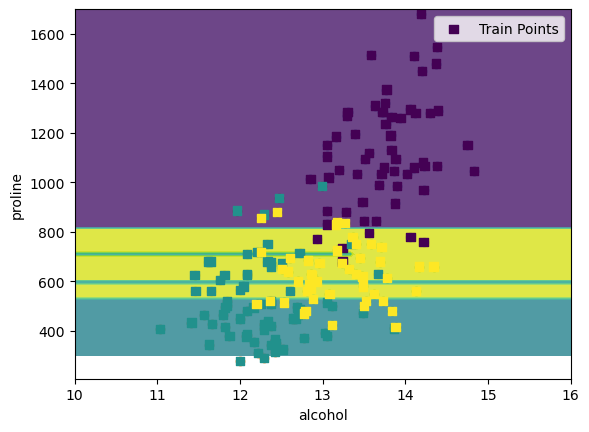

In [5]:
df = pd.read_csv('data/wine.data',header = None)
df = df.drop(df.columns[2:13], axis=1)
df.columns = ['target','alcohol','proline']

# visualizing data
p1 =df[df['target']==1]
p2 =df[df['target']==2]
p3 =df[df['target']==3]
plt.scatter(p1['alcohol'],p1['proline'])
plt.scatter(p2['alcohol'],p2['proline'])
plt.scatter(p3['alcohol'],p3['proline'])
plt.xlabel('alcohol')
plt.ylabel('proline')

X = df[['alcohol','proline']]
y = df['target']

knn_classifier = KNeighborsClassifier(n_neighbors=20)
knn_classifier.fit(X, y)

X_mesh,Y_mesh = np.meshgrid(np.linspace(10,16,100),np.linspace(300,1700,100))
points = np.column_stack((X_mesh.ravel(), Y_mesh.ravel()))

classified_labels = knn_classifier.predict(points)
classified_labels = classified_labels.reshape(X_mesh.shape)

# plot the points in appropriate color
plt.contourf(X_mesh, Y_mesh, classified_labels, cmap='viridis', alpha=0.8)


# Plot the test points
plt.scatter(X['alcohol'], X['proline'], c=y, cmap='viridis', marker='s', label='Train Points')
# plt.scatter(X['alcohol'], X['proline'], c=y_test, cmap='viridis', marker='s', label='Test Points')
plt.legend()

In [90]:
X = df[['alcohol','proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=20)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


# # Plot the data points from dataset_21
# plt.scatter(X0[:,0],X0[:,1], label = '0')
# plt.scatter(X1[:,0],X1[:,1], label = '1')


Accuracy: 77.78%


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


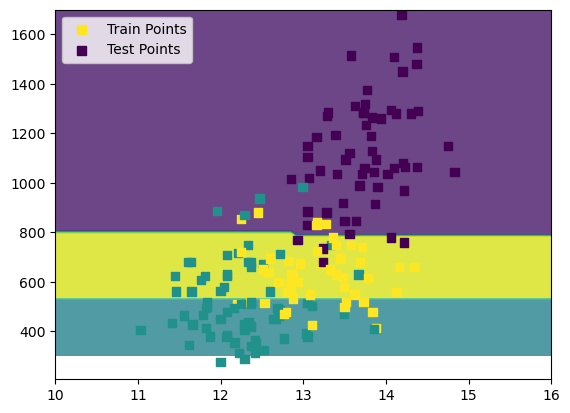

In [91]:
X_mesh,Y_mesh = np.meshgrid(np.linspace(10,16,100),np.linspace(300,1700,100))
points = np.column_stack((X_mesh.ravel(), Y_mesh.ravel()))

classified_labels = knn_classifier.predict(points)
classified_labels = classified_labels.reshape(X_mesh.shape)

# # plot the points in appropriate color
plt.contourf(X_mesh, Y_mesh, classified_labels, cmap='viridis', alpha=0.8)


# Plot the test points
plt.scatter(X_train['alcohol'], X_train['proline'], c=y_train, cmap='viridis', marker='s', label='Train Points')
plt.scatter(X_test['alcohol'], X_test['proline'], c=y_test, cmap='viridis', marker='s', label='Test Points')
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv('data/wine.data', header=None)
data.columns = ['label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']

# Select relevant columns
selected_data = data[['label', 'alcohol', 'proline']]

# Split data into features and target
X = selected_data.drop('label', axis=1)
y = selected_data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier
k = 20
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Plot the decision boundary
x_min, x_max = X_test['alcohol'].min() - 1, X_test['alcohol'].max() + 1
y_min, y_max = X_test['proline'].min() - 1, X_test['proline'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_test['alcohol'], X_test['proline'], c=y_pred, cmap='viridis', label='Predicted Category')
plt.scatter(X_test['alcohol'], X_test['proline'], c=y_test, cmap='viridis', marker='x', label='True Category')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('KNN Decision Boundary and Classification Results (k=20)')
plt.legend()
plt.colorbar(label='Category')
plt.show()

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# 3.2 Data scaling

Scale the data from Problem 3.1 using `StandardScaler`. Compare the results with the function `whiten` from Problem 1.3.

In [92]:
def whiten(X): # when you pass an argument in python you modify it in place!

    for col in X.columns:
        X[col] = (X[col] - np.mean(X[col]))/np.std(X[col])
    return X


In [96]:
scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_whitened = pd.DataFrame(whiten(X.copy()), columns=X.columns)

print("Original Data:")
print(X)

print("\nStandard Scaled Data:")
print(X_standard_scaled)

print("\nWhitened Data:")
print(X_whitened)

Original Data:
     alcohol  proline
0      14.23     1065
1      13.20     1050
2      13.16     1185
3      14.37     1480
4      13.24      735
..       ...      ...
173    13.71      740
174    13.40      750
175    13.27      835
176    13.17      840
177    14.13      560

[178 rows x 2 columns]

Standard Scaled Data:
      alcohol   proline
0    1.518613  1.013009
1    0.246290  0.965242
2    0.196879  1.395148
3    1.691550  2.334574
4    0.295700 -0.037874
..        ...       ...
173  0.876275 -0.021952
174  0.493343  0.009893
175  0.332758  0.280575
176  0.209232  0.296498
177  1.395086 -0.595160

[178 rows x 2 columns]

Whitened Data:
      alcohol   proline
0    1.518613  1.013009
1    0.246290  0.965242
2    0.196879  1.395148
3    1.691550  2.334574
4    0.295700 -0.037874
..        ...       ...
173  0.876275 -0.021952
174  0.493343  0.009893
175  0.332758  0.280575
176  0.209232  0.296498
177  1.395086 -0.595160

[178 rows x 2 columns]


# 3.3 Classification with scaling

Solve problem 3.1 based on the scaled data.

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. 

Accuracy: 91.67%


Text(0.5, 1.0, 'Knn with scaled data')

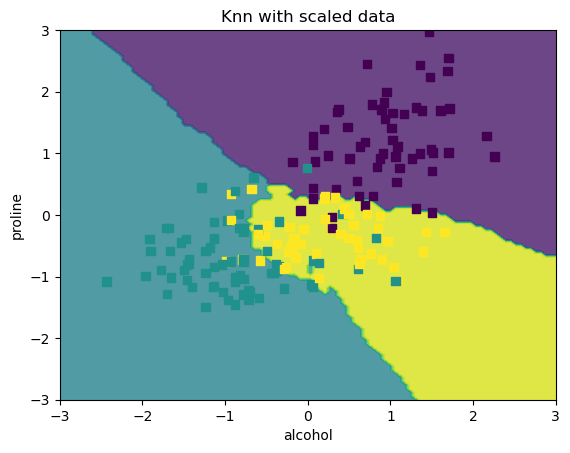

In [101]:
X_s = X_standard_scaled

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=42)

knn_classifier_s = KNeighborsClassifier(n_neighbors=20)
knn_classifier_s.fit(X_train, y_train)
y_pred = knn_classifier_s.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

X_mesh,Y_mesh = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
points = np.column_stack((X_mesh.ravel(), Y_mesh.ravel()))

classified_labels_s = knn_classifier_s.predict(points)
classified_labels_s = classified_labels_s.reshape(X_mesh.shape)

# # plot the points in appropriate color
plt.contourf(X_mesh, Y_mesh, classified_labels_s, cmap='viridis', alpha=0.8)


# Plot the test points
plt.scatter(X_train['alcohol'], X_train['proline'], c=y_train, cmap='viridis', marker='s', label='Train Points')
plt.scatter(X_test['alcohol'], X_test['proline'], c=y_test, cmap='viridis', marker='s', label='Test Points')
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.title('Knn with scaled data')

# 3.4 Train-test

Split 'wine' dataset into two groups: (1) train set with 80% of the observations, (2) test set with 20% of the observations (`train_test_split`). For normalised and non-normalised case, classify the points from test set based on the train set using KNN algorithm. Compute the ratio of incorrectly classified data.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('data/wine.data', header=None)
data.columns = ['label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline']

# Select relevant columns
X = data.drop('label', axis=1)
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to compute the ratio of incorrectly classified data
def compute_incorrect_ratio(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Normalized case
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier_normalized = KNeighborsClassifier(n_neighbors=5)
knn_classifier_normalized.fit(X_train_scaled, y_train)
y_pred_normalized = knn_classifier_normalized.predict(X_test_scaled)
incorrect_ratio_normalized = compute_incorrect_ratio(y_test, y_pred_normalized)

# Non-normalized case
knn_classifier_non_normalized = KNeighborsClassifier(n_neighbors=5)
knn_classifier_non_normalized.fit(X_train, y_train)
y_pred_non_normalized = knn_classifier_non_normalized.predict(X_test)
incorrect_ratio_non_normalized = compute_incorrect_ratio(y_test, y_pred_non_normalized)

# Print the ratios
print("Incorrect Ratio (Normalized):", incorrect_ratio_normalized)
print("Incorrect Ratio (Non-Normalized):", incorrect_ratio_non_normalized)


Incorrect Ratio (Normalized): 0.05555555555555558
Incorrect Ratio (Non-Normalized): 0.2777777777777778


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

Incorrectly classified in original data: 0.33
Incorrectly classified in standardised data: 0.14


# 3.5 Creating a pipeline

Sklearn library faciliates the use of multiple nested models and data transformers. Use `Pipeline` command to create combined scaling and KNN classification object. Reproduce the results for the standardised data from Problem 3.4.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=20))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_pipeline = pipeline.predict(X_test)

# Compute the ratio of incorrectly classified data
incorrect_ratio = compute_incorrect_ratio(y_test, y_pred_pipeline)
# incorrect_ratio = (y_pred_pipeline != y_test).sum() / len(y_test)
print("Ratio of incorrectly classified data:", incorrect_ratio)


Ratio of incorrectly classified data: 0.02777777777777779


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Incorrectly classified in standardised data: 0.14
